In [1]:
import pandas as pd

In [103]:
fenc = pd.read_csv('/Users/Seb/development/redi/data-analysis-project/data/fatalencounters.csv')
post = pd.read_csv('/Users/Seb/development/redi/data-analysis-project/data/database.csv')

In [107]:
post.state.head()

0    WA
1    OR
2    KS
3    CA
4    CO
Name: state, dtype: object

In [132]:
deaths_post = pd.DataFrame(post.groupby(['state']).count()['id']).reset_index()

In [134]:
fenc_post = pd.DataFrame(fenc.groupby(['Location of death (state)']).count()['Timestamp']).reset_index()

In [137]:
#pd.merge(deaths_post, fenc_post, left_on='state', right_on='Location of death (state)')

In [ ]:
pd.concat(deaths_post, fenc_post))

In [168]:
# Excluding absurd future dates
fenc = fenc[fenc['Date (Year)'] < 2017]

In [93]:
import datetime

In [169]:
dates = []
for date in fenc['Date of injury resulting in death (month/day/year)']:
    month = (strptime(date[:3],'%b').tm_mon)
    day = int(date[date.index(' ')+1:date.index(',')])
    year = int(date[date.index(', ')+2:])
    dates.append(datetime.datetime(year=year, month=month, day=day))

In [186]:
fenc['month'] = fenc['date'].dt.month
fenc['year'] = fenc['date'].dt.year

In [173]:
fenc['date'] = dates

In [202]:
fenc['Subject\'s age'].value_counts()

22           714
21           658
24           630
25           627
26           627
23           625
27           595
29           586
31           578
30           562
28           558
33           538
20           533
32           523
19           507
34           504
35           495
36           473
18           469
38           469
40           449
37           442
39           408
42           397
41           387
43           361
45           359
44           358
47           318
46           298
            ... 
40s            4
3 months       2
92             2
89             2
90             2
18-25          2
91             2
107            1
3 days         1
45 or 49       1
7 months       1
25`            1
10 months      1
25-30          1
95             1
40-50          1
101            1
18 months      1
20s-30s        1
8 months       1
97             1
9 months       1
70s            1
55.            1
46/53          1
4 months       1
93             1
6 months      

In [192]:
colormap = {'CA': 'red', 'TX': 'blue'}

<IPython.core.display.Javascript object>


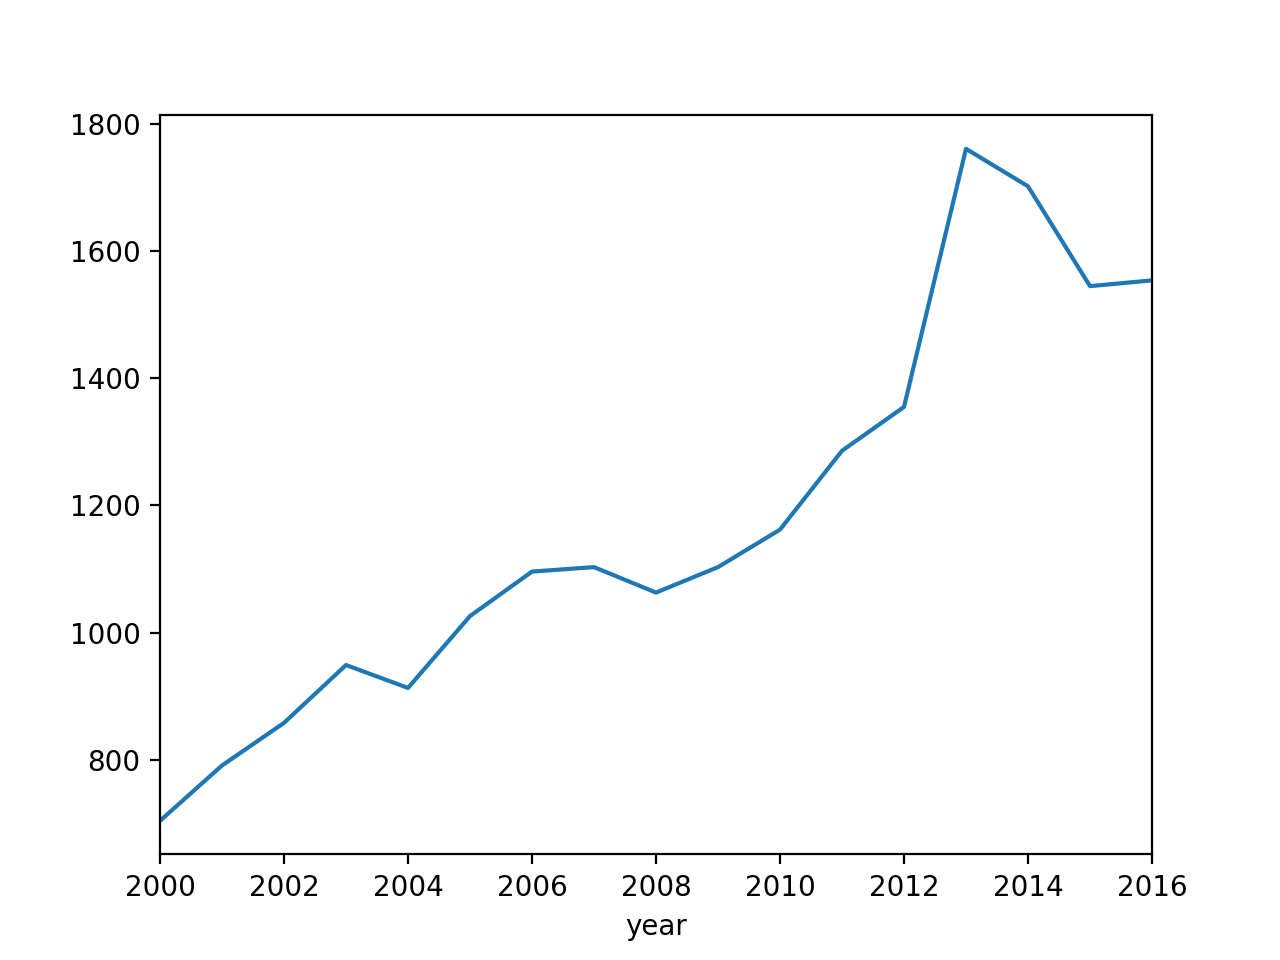

In [194]:
%matplotlib notebook
fenc.groupby(['year']).count()['Timestamp'].plot()